### .Imports

In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import numpy as np

%pylab inline
pylab.rcParams['figure.figsize'] = (20,12)

Populating the interactive namespace from numpy and matplotlib


### .Constants

In [3]:
DATA_FOLDER = '../data_clean'
IS_DATE = re.compile("^[1-2]{1}[0-9]{3}$")

### .Usefull functions

In [4]:
def getKeysByValue(dictOfElements, valueToFind):
    '''
    find the key of a canton
    '''
    for item  in dictOfElements:
        if valueToFind in dictOfElements[item]:
            return item
            break
        if valueToFind==item:
            return valueToFind
            break
    return None

In [5]:
dict_cantons = dict()
dict_cantons['AA'] = ['Appenzell Rh.-Ext.','Appenzell Ausserrhoden','AR']
dict_cantons['AG'] = ['Argovie','Aargau']
dict_cantons['AI'] = ['Appenzell Rh.-Int.','Appenzell Innerrhoden']
dict_cantons['BE'] = ['Berne', 'Bern', 'Bern / Berne']
dict_cantons['BL'] = ['Bâle-Campagne','Basel-Landschaft']
dict_cantons['BS'] = ['Bâle-Ville','Basel-Stadt','Bâle-Ville   2)','Bâle-Ville  2)']
dict_cantons['FR'] = ['Fribourg', 'Fribourg / Freiburg']
dict_cantons['GE'] = ['Genève', 'Genf']
dict_cantons['GL'] = ['Glaris', 'Glarus']
dict_cantons['GR'] = ['Grisons', 'Graubünden', 'Grigioni', 'Grischun', 'Graubünden / Grigioni / Grischun']
dict_cantons['JU'] = ['Jura']
dict_cantons['LU'] = ['Lucerne', 'Luzern']
dict_cantons['NE'] = ['Neuchâtel']
dict_cantons['NW'] = ['Nidwald', 'Nidwalden']
dict_cantons['OW'] = ['Obwald', 'Obwalden']
dict_cantons['SG'] = ['St. Gall', 'St. Gallen','Saint-Gall']
dict_cantons['SH'] = ['Schaffhouse', 'Schaffhausen']
dict_cantons['SO'] = ['Soleure', 'Solothurn']
dict_cantons['SZ'] = ['Schwytz', 'Schwyz']
dict_cantons['TE'] = ['Tessin', 'Ticino','TI']
dict_cantons['TG'] = ['Thurgovie', 'Thurgau']
dict_cantons['UR'] = ['Uri']
dict_cantons['VS'] = ['Valais', 'Wallis', 'Valais / Wallis']
dict_cantons['VD'] = ['Vaud']
dict_cantons['ZG'] = ['Zoug', 'Zug']
dict_cantons['ZH'] = ['Zurich', 'Zürich']

#### Function to restrict the dataframe to a fix period in term of years

In [6]:
def get_period(df, start=None,end=None):
    columns_to_keep = []
    dates = []
    for elem in df.columns:
        if not IS_DATE.match(elem):
            columns_to_keep.append(elem)
        else:
            dates.append(int(elem))
    if start == None:
        start = np.min(dates)
    if end == None:
        end = np.max(dates)
    
    for date in dates:
        if (date<=end) & (date>=start):
            columns_to_keep.append(str(date))
    
    return df[columns_to_keep]

#### Function to get the age corresponding to the intervales as input

In [7]:
def build_age(intervales,age_max):
    ages_total = []
    for i in range(len(intervales)-1):
        ages = []
        ages.append(intervales[i])
        for k in range(int(intervales[i]),int(intervales[i+1])):
            age = map_int_to_age(k,age_max)
            ages.append(age)
            if(k==100):
                break
        ages_total.append(ages)
    return ages_total

In [8]:
def map_int_to_age(k,age_max):
    if(k != 1 and k<age_max):
        return '{} ans'.format(k)
    if(k == 1):
        return '{} an'.format(k)
    if(k==age_max):
        if (age_max == 100):
            return '{} ans ou plus'.format(age_max)
        else:
            return '{} ans et plus'.format(age_max)

#### Function to describe a dataframe

In [9]:
def describeDf(df,name="DESCRIPTION",level=1):
    print("______________________________ " + name+" ______________________________\n")
    date = []
    if(level==1):
        print("\n")
        for col in df.columns:
            if((not IS_DATE.match(col)) & (not re.compile("[0-9]+ an").match(col))):
                print("         ATTRIBUTE: "+col)
                print("   "+str(df[col].unique()))
                print("\n")
            else:
                date.append(col)
        print("         VALUES: "+str(date))
        print("\n\n\n")
    else :
        print(df.columns.values)
        print("\n\n\n")

### .Load Dataframe

In [10]:
dataframes = {}
print("Dataframes available:\n\n")
for file in os.listdir(DATA_FOLDER):
    filename = os.fsdecode(file)
    tablename = "df_"+os.path.splitext(os.path.splitext(filename)[0])[0]
    globals()[tablename] = pd.read_csv(DATA_FOLDER + '/' + filename)
    try:
        globals()[tablename] = globals()[tablename].drop(columns=['Unnamed: 0'])
    except:
        pass
#     describeDf(globals()[tablename], name=tablename,level=0)
    dataframes[tablename] = globals()[tablename]
    

Dataframes available:




In [11]:
# Some useful regular expressions to identify the wanted datasets
regex_canton = re.compile('.*[C|c]anton.*')
regex_population = re.compile('.*Population.*')
cantons_dfs=[]
for index in dataframes:
    if not regex_population.match(index):
        for col in dataframes[index].columns:
            if regex_canton.match(col):
#                 describeDf(dataframes[index],index,level=1)
                if index not in ['df_Depense_menages_canton','df_hacked_accident']:
                    cantons_dfs.append(index)
                break

In [12]:
for df in cantons_dfs:
    globals()[df].canton = globals()[df].canton.apply(lambda x: getKeysByValue(dict_cantons, x))
    globals()[df] = globals()[df].dropna()


In [13]:
for df in cantons_dfs:
    print(df)
    display(globals()[df].head(2))

df_Accident_cantons


,canton_index,canton,gravite_index,gravite,ruralite_index,ruralite,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.0,ZH,315.0,Accidents avec blessés légers,10.0,En localité,1323.0,1514.0,1752.0,1629.0,...,2035.0,2020.0,1915.0,1874.0,1789.0,1696.0,1877.0,2039.0,2247.0,2161.0
1,1.0,ZH,315.0,Accidents avec blessés légers,11.0,Hors localité,388.0,341.0,366.0,360.0,...,354.0,395.0,358.0,315.0,321.0,314.0,340.0,353.0,352.0,419.0


df_Besoin_sante


,annee,canton,Total,Soins hopitaux,Soins domicile,Administration Prevention,besoin_par_habitant
0,1996,AA,38.845225,37.085203,0.176061,1.583962,751.683415
1,1996,AI,4.794571,4.155756,0.363790,0.275025,456.258563


df_Frais_routes_cantonales


,annee,canton,Total,Constructions,Amélio-,Acquisition,Entretien Construction,Entretien Exploitation,Administration,Surveillance Policiere
0,1994,AA,31374.0,0,16298,-46,2796,7706,1705.0,2915
1,1994,AI,4206.0,488,931,0,265,1107,887.0,527


df_Frais_routes_communales


,annee,canton,Total,Constructions,Améliorations,Acquisition,Entretien Construction,Entretien Exploitation,Administration,Surveillance Policiere,Depense_habitants
0,1994,AA,13832.0,12,2344,74,1860,8949,593.0,0,256
1,1994,AI,3530.0,98,1408,9,443,1316,167.0,88,246


df_Frais_routes_nationales


,annee,canton,Acquisition,Administration,Améliorations,Constructions,Entretien Construction,Entretien Exploitation,Surveillance Policiere,Total
0,1994,AA,0,0.0,0,0,0,0,0,0
1,1994,AI,0,0.0,0,0,0,0,0,0


df_Longueur_routes


,annee,canton,Total,Routes nationales,Routes cantonales,Routes communales
0,1992,AA,434.0,0.0,231.0,203.0
1,1992,AI,139.0,0.0,48.0,91.0


df_Recettes_routes


,annee,canton,Total,Total contributions,Total taxes
0,1994,AA,21915.0,11258.0,10658.0
1,1994,AI,5811.0,2883.0,2928.0


df_Voitures


,canton_index,canton,carosserie_index,carosserie,carburant_index,carburant,cylindre_index,cylindre,traction_index,traction,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.0,ZH,11.0,Limousine,100.0,Essence,101399.0,jusqu'à 1399 cm3,1.0,Traction avant,...,9465.0,9462.0,9364.0,9276.0,9375.0,9315.0,9448.0,9474.0,9881.0,10412.0
1,1.0,ZH,11.0,Limousine,100.0,Essence,101399.0,jusqu'à 1399 cm3,1.0,Traction avant,...,86546.0,87274.0,91180.0,96187.0,100565.0,105378.0,109020.0,113222.0,115168.0,116336.0


In [14]:
annees = [d for d in range(1994,2016)]

In [120]:
features_cantons = {}

for canton in dict_cantons:
    features_cantons[canton] = pd.DataFrame({'annee':annees})
    for df in cantons_dfs:
        if(df not in ['df_Voitures','df_Accident_cantons','df_Besoin_sante']):
            for column in globals()[df].columns:
                if (column not in ['annee','canton']):
                    name = df.split('_',1)[1]+'-'+column
                    feature = globals()[df][(globals()[df].canton=='ZH') & (globals()[df].annee.isin(annees))].sort_values('annee')[column].values
                    features_cantons[canton][name]=feature

In [121]:
'df_Frais_routes_communales'.split('_',1)


['df', 'Frais_routes_communales']

In [122]:
accidents_cantons = {}

accidents = df_Accident_cantons.groupby('canton').sum()[[d for d in df_Accident_cantons.columns if (IS_DATE.match(d))]]
accidents = accidents[[d for d in accidents.columns if ((int(d) in annees))]]

for canton in dict_cantons:
    
    accidents_cantons[canton] = accidents[accidents.index==canton].transpose()[canton].values

In [123]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz,ExtraTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.preprocessing import normalize
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [124]:
def get_clf():
    return ExtraTreeRegressor()
verbose = True

In [125]:
gg = 0
noob = 0
trees = {}
for canton in dict_cantons:
    clf = get_clf()
    X = normalize(features_cantons[canton].values)
    #Training
    clf.fit(X[:-1],accidents_cantons[canton][:-1])
    #Predict
    pred = clf.predict([X[21]])
    true_value = accidents_cantons[canton][21]
    std = np.std(accidents_cantons[canton])
    indic_real = np.abs((pred-true_value)/std)[0]
    if (verbose):
        print("[{}] - REAL SYSTEM:".format(canton))
        print("prediction : {}   /   real : {}   /   variation : {}   /   indicator : {}"\
              .format(pred,true_value,np.abs((pred-true_value)/true_value)[0],indic_real))
    try:
        trees[canton] = export_graphviz(clf,out_file=None,feature_names=features_cantons[canton].columns)
    except:
        pass
    clf = get_clf()
    X = normalize(features_cantons[canton][['annee']].values)
    #Training
    clf.fit(X[:-1],accidents_cantons[canton][:-1])
    #Predict
    pred = clf.predict([X[21]])
    indic_dummy = np.abs((pred-true_value)/std)[0]
    if (verbose):
        print("\nDUMMY SYSTEM:")
        print("prediction : {}   /   real : {}   /   variation : {}   /   indicator : {}"\
              .format(pred,true_value,np.abs((pred-true_value)/true_value)[0],indic_dummy))
        print("\n\n")
    if(indic_real<indic_dummy):
        gg+=1
    else:
        noob+=1
print('\n\n\n GREAT : {}  /  BAD : {}'.format(gg,noob))
        
    

[AA] - REAL SYSTEM:
prediction : [85.]   /   real : 78.0   /   variation : 0.08974358974358974   /   indicator : 0.39029890723000693

DUMMY SYSTEM:
prediction : [122.9047619]   /   real : 78.0   /   variation : 0.5757020757020757   /   indicator : 2.503754214407459



[AG] - REAL SYSTEM:
prediction : [1250.]   /   real : 1213.0   /   variation : 0.030502885408079144   /   indicator : 0.22500268225363532

DUMMY SYSTEM:
prediction : [1494.61904762]   /   real : 1213.0   /   variation : 0.23216739292584312   /   indicator : 1.7125686780540537



[AI] - REAL SYSTEM:
prediction : [20.]   /   real : 30.0   /   variation : 0.3333333333333333   /   indicator : 1.5762612693720486

DUMMY SYSTEM:
prediction : [32.66666667]   /   real : 30.0   /   variation : 0.08888888888888881   /   indicator : 0.4203363384992126



[BE] - REAL SYSTEM:
prediction : [2462.]   /   real : 2551.0   /   variation : 0.03488827910623285   /   indicator : 0.3232394914104436

DUMMY SYSTEM:
prediction : [2922.9047619]   /

In [126]:
accidents_cantons['BL']

array([674., 724., 636., 710., 751., 727., 762., 709., 661., 731., 667.,
       654., 701., 685., 720., 736., 611., 544., 482., 469., 475., 478.])

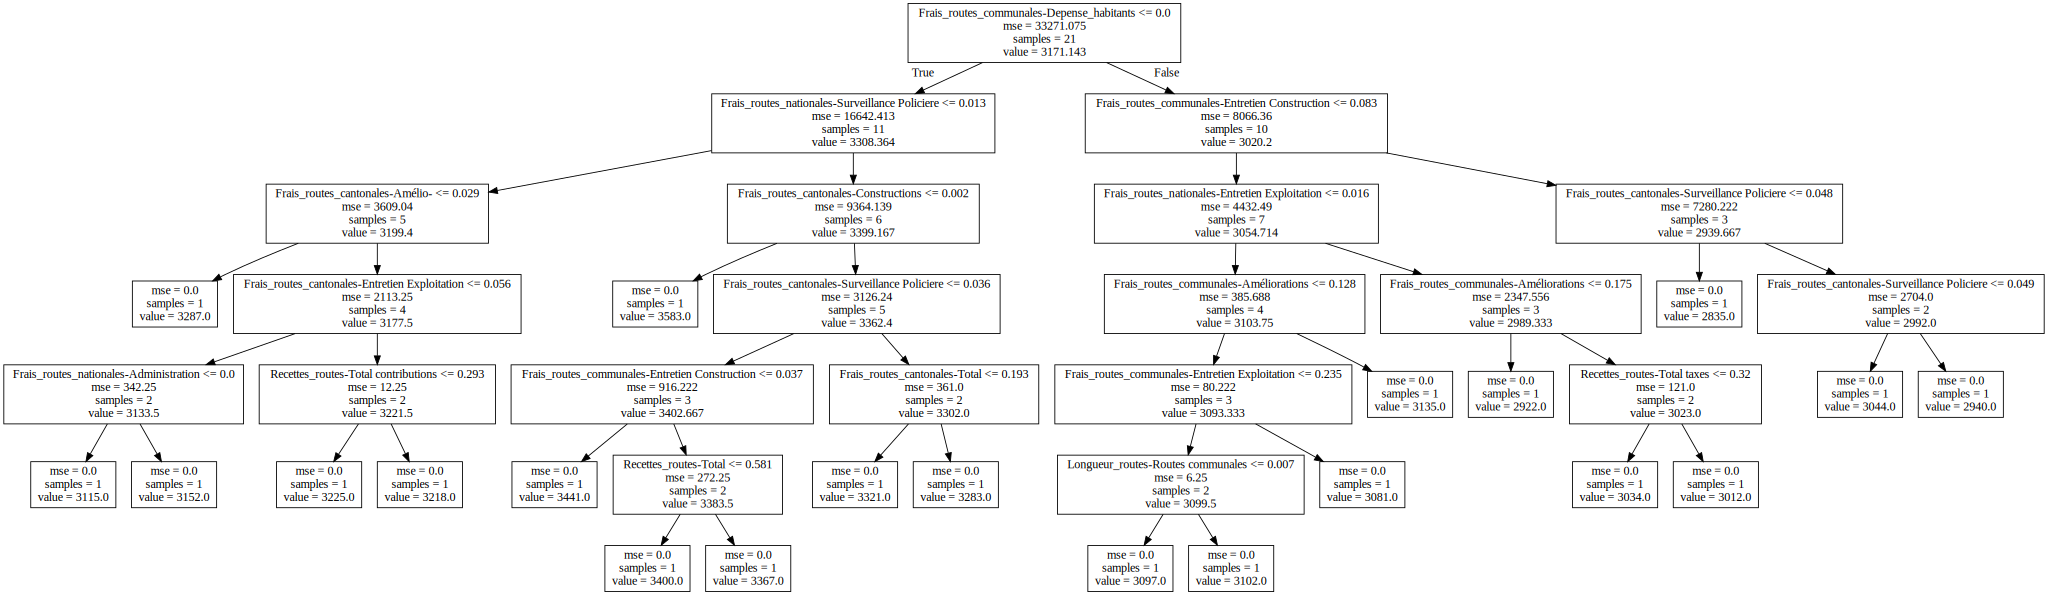

In [127]:
import graphviz 
graphviz.Source(trees['ZH'])